# What's awesome about Functional Programming

### You don’t solve different problems in FP.  <br>But you solve them differently.

<br>
<br>

Thomas Mahler | Senior IT Architect | ista International GmbH


# Learning a new paradigm:

### So many new concepts, ideas, vocabulary, ...

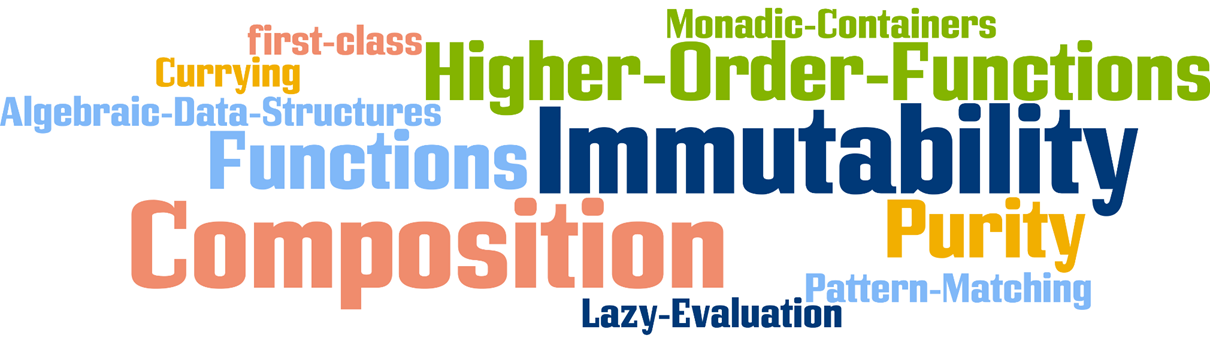

> “functional programming is a programming paradigm where programs are constructed 
> by applying and composing functions. It is a declarative programming paradigm in which function definitions 
> are trees of expressions that each return a value, rather than a sequence of imperative statements which change 
> the state of the program.”

- What does that mean?
- How does it matter to developers?

# Functions are first class citizens

Wikipedia: “In functional programming (**FP**), functions are treated as first-class citizens, meaning that

1. they can be bound to names (including local identifiers),
2. passed as arguments,
3. and returned from other functions, just as any other data type can.

This allows programs to be written in a declarative and composable style, where small functions are combined in a modular manner.”

As this is at the core of FP, we’ll have a closer look at each of these 3 properties.
All code-examples in this presentation are in the [Haskell language](https://www.haskell.org/). 

# Functions can be bound to names (1)

```haskell
-- define constant `aNumber` as 42. -- | This is a comment
aNumber :: Integer                  -- | This is a type signature
aNumber = 42                        -- | This is a definition

-- define constant `aString` with a value of “Hello World“.
aString :: String
aString = "Hello World"
```

In [ ]:
-- define a function `square`: take an Integer argument and compute its square
square :: Integer -> Integer
square n = n ^ 2

square 15

-- define a function `double`: take an Integer argument and compute its double
double :: Integer -> Integer
double n = 2 * n

double 15

# Passing functions as arguments (2)




In [2]:
-- predicate functions on integers
even :: Integer -> Bool
even n =  n `rem` 2 == 0

odd :: Integer -> Bool
odd n =  n `rem` 2 /= 0

In [3]:
ifOddDouble :: Integer -> Integer
ifOddDouble n = 
  if odd n
    then double n
    else n

ifOddSquare :: Integer -> Integer
ifOddSquare n =
    if odd n
      then square n
      else n
    
ifOddDouble 7
ifOddSquare 7

14

49

In [4]:
ifOdd :: (Integer -> Integer) -> Integer -> Integer
ifOdd growthFunction n =
  if odd n
    then growthFunction n
    else n

ifOddDouble :: Integer -> Integer
ifOddDouble = ifOdd double

ifOddSquare :: Integer -> Integer
ifOddSquare = ifOdd square

ifOddDouble 7
ifOddSquare 7 

14

49

`ifOdd` is called a **higher order function**,
as it accepts another function as argument.

Great, but now the customer wants functions that only act on even numbers. 

A function `ifEven :: (Integer -> Integer) -> Integer -> Integer`
would have to repeat most of the existing code. 

We don‘t want to repeat ourselves, so we must also be able to pass in the predicate function…

# OK, Time for some refactoring !

```haskell
ifPredGrow :: (Integer -> Bool)     -- a predicate function (e.g. even)
           -> (Integer -> Integer)  -- a growth function (e.g. double)
           -> Integer               -- the input number
           -> Integer               -- the output number
ifPredGrow predicate growthFunction n =
  if predicate n
    then growthFunction n
    else n
```

```haskell
ifEvenDouble :: Integer -> Integer
ifEvenDouble n = ifPredGrow even double n

ifEvenSquare :: Integer -> Integer
ifEvenSquare n = ifPredGrow even square n

ifOddDouble :: Integer -> Integer
ifOddDouble n = ifPredGrow odd double n
```


## Awesome !


Higher order functions like `ifPredGrow` form a template which can be used to implement concrete algorithms by filling in the blanks (i.e. The function arguments)

Compare also to OO patterns Strategy and Template Method.

- Helps to keep us DRY
- reduces complexity.
- All elements can be tested in isolation, which improves testability

# Returning functions as values (3)<br>A. function composition

Function composition is an operation that takes two functions `f` and `g` and produces a function `h` such that `h(x) = g(f(x))`.

The resulting composite function is denoted `h = g ∘ f` where `(g ∘ f )(x) = g(f(x))`.

Intuitively, composing functions is a chaining process in which the output of function f is used as input of function g.

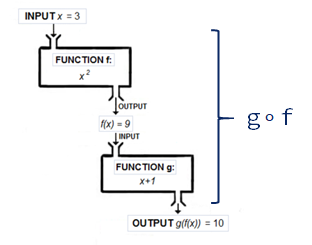

So looking from a programmers perspective the `∘` operator is a function that takes two functions as arguments and returns a new composite function. In an FP language it can be defined as:

In [5]:
(∘) :: (b -> c) -> (a -> b) -> a -> c
(g ∘ f) x = g (f x)

where `g :: (b -> c)`, `f :: (a -> b)` and `x :: a`

In [6]:
square :: Integer -> Integer
square n = n ^ 2

add1 :: Integer -> Integer
add1 x = x + 1

add1AfterSquare :: Integer -> Integer
add1AfterSquare = add1 ∘ square

add1AfterSquare 3

10

## Awesome!
Composition allows to build up complex functions from sequences of simpler functions.
- This reduces (mental) complexity.
- All elementary functions can be unit tested in isolation, which improves testability.
- Improves maintainability of the code

# Returning functions as values (3)<br>B. Partial application

```haskell
-- function adding two numbers (add 2 3 -> 5)
add :: Integer -> Integer -> Integer 
add a b = a + b
```

The type signature can be read as: "A function taking an `Integer` argument and returning a function of type `Integer -> Integer"`. 

Sounds weird? But that's exactly what most functional languages do internally. So if we call `add 2 3`, first `add` is applied to `2` which returns a new function of type `Integer -> Integer` which is then applied to 3.

This technique is called **Currying**. Currying is widely used in FP as it allows another cool technique: **partial application**:

In [7]:
add5 :: Integer -> Integer
add5 = (+) 5

add5 7

12

## Awesome !

In FP *partial application* is frequently used to provide functions with configuration data or infrastructure access (e.g. db connections).

# Recursion and pattern matching

Remember the factorial function from high school? For all $n \in \mathbb{N}_0$, $n!$ is defined as:

```haskell
0! = 1
n! = n * (n-1)!  
```

With our current knowledge we could implement it as follows (where the type `Natural` represents $\mathbb{N}_0$):

```haskell
fac :: Natural -> Natural
fac n =
  if n == 0
    then 1
    else n * fac (n - 1)
```

Most functional languages provide pattern matching, which allows to declare the function much closer to the original mathematical definition as a set of equations:

In [8]:
import GHC.Natural

fac :: Natural -> Natural
fac 0 = 1                 
fac n = n * fac (n - 1)

fac 10

3628800

## Awesome !

Code with pattern matching is easier to read, as it helps to avoid nested `if ... then ... else ...` constructs that analyze input parameters.

Pattern matching not only works on numbers but on any other datatypes as well, we’ll see some of this in the section on Lists!

# Immutability, purity & equational reasoning

FP languages provide **immutability**. That is, no value can ever be changed.
There are thus no assigments operations. But what about the `=` sign? The `=` sign is not an assigment, but rather a definition as in mathematics, which declares two things to be identical.

The defining clauses of the fac function can thus be understood as algebraic equations:

```haskell
fac :: Natural -> Natural
fac 0 = 1                 -- (a)
fac n = n * fac (n - 1)   -- (b)
```

Using these equations we can use **equational reasoning** (aka. term rewrite rules) to understand how a functional program like `fac 2` is evaluated:

```haskell
fac 2 =
      = 2 * fac (2 - 1)       -- expanding (b)
      = 2 * fac 1             -- computing 2 - 1
      = 2 * 1 * fac (1 - 1)   -- expanding (b)
      = 2 * fac 0             -- computing 1-1=0 , 2*1=2
      = 2 * 1                 -- expanding (a)
      = 2                     -- computing 2*1=2
```

## Purity

What if some part of the `fac` code would throw an exception during this evaluation?

It would completely destroy our equational reasoning approach. So in addition to **Immutability** we need another property on our code to allow for equational reasoning, **Purity**! 


**Purity**: A function is called pure if it corresponds to a function in the mathematical sense: it associates each possible input value with an output value, and does nothing else. In particular,

- it has no side effects, that is to say, invoking it produces no observable effect other than the result it returns; it cannot also e.g. write to disk, or print to a screen.
- it does not depend on anything other than its parameters, so when invoked in a different context or at a different time with the same arguments, it will always produce the same result.

A function like fac is pure, as it solely depends on input values not on anything external. 

## Awesome !

We can use the same notation that the code uses to reason about the program semantics ! 
So you‘ll find these kind of reasoning often in FP.

What you can proof you don‘t have to test!

Purity also improves testability: It is much easier to set up tests without worrying about mocks or stubs to factor out access to backend layers.

This is why in FP you try to write as much pure code as possible and strictly  separate it from code that has to interface to the outside world.

# Lists

Working with lists is fundamental to most FP languages. 

A list can either be the empty list (denoted by the data constructor `[]`) or some first element of a data type `a` followed by a list with elements of type `a`, denoted by `[a]`.
This intuition is reflected in the following data type definition:

```haskell
data [a] = [] | a : [a]
```

Please note infix cons operator `(:)` which is declared as a data constructor that builds a list from a single element of type `a` and a list of type `[a]`.

The `|` separates the possible alternatives to build a List.

A list containing the three numbers 1, 2, 3 is constructed like this:

```haskell
myList = 1 : 2 : 3 : []
```

Luckily most FP languages provide some syntactic sugar for lists so you can write it also as:

```haskell
myList = [1,2,3]
```

# Pattern Matching on Lists

When working with lists we will typically use the two alternatives of the list data type definition for pattern matching:

```haskell
data [a] = [] | a : [a]
```

For example take the length function that determines the length of a list:

```haskell
length :: [a] -> Integer
length []     =  0
length (x:xs) =  1 + length xs
```

We can read these equations as: The length of the empty list `[]` is 0, and the length of a list, whose first element is `x` and with remainder `xs`, is 1 plus the length of `xs`.

In [9]:
myList = [1,2,3]
length myList

3

# Algebraic data types (ADTs)

Most functional languages allows you to create arbitrary data types by combining sum types and product types. 

```haskell
-- two simple sum types:
data Status = Green | Yellow | Red
data Severity = Low | Middle | High

-- a simple product type
data Tuple = Tuple Status Severity
```

The complete range of data types that can be constructed in this way is called **algebraic data types** or ADT in short.

Using algebraic data types has several advantages:

- Pattern matching can be used to analyze any concrete instance to select different behaviour based on input data. 
- Compilers can detect incomplete patterns matches or other flaws.
- Compilers can automatically derive functionality for ADTs as they are constructed in such a regular way, thus avoiding boilerplate code.

# Using higher order functions for abstraction<br>1. Mapping over a list

```haskell
-- compute squares for all list elements (squareAll [1,2,3] -> [1,4,9])
squareAll :: [Integer] -> [Integer]
squareAll [] = []
squareAll (n:rest) = square n : squareAll rest
```

```haskell
-- double all list elements (doubleAll [1,2,3] -> [2,4,6])
doubleAll :: [Integer] -> [Integer]
doubleAll [] = []
doubleAll (n:rest) = double n : doubleAll rest
```

We don't want to repeat ourselves so we want something that captures  the essence of mapping a function over a list:

```haskell
map :: (a -> b) -> [a] -> [b]
map f []     = []
map f (x:xs) = f x : map f xs
```

In [10]:
-- now squareAll can be defined in terms of map:
squareAll :: [Integer] -> [Integer]
squareAll = map square

squareAll [1,2,3,4]

[1,4,9,16]

## Awesome!

We don‘t have to explain to the computer **how** to compute something.<br>
Instead we just declare our intention, **what** we want to be computed. <br>
This is called declarative style.

# Using higher order functions for abstraction<br>2. folding / reducing a list

```haskell
-- sum up a list of numbers: (sum [1,2,3,4] -> 10)
sum :: [Integer] -> Integer
sum [] = 0
sum (n:rest) = n + sum rest
```

```haskell
-- compute the product of a list of numbers: (prod [1,2,3,4] -> 24)
prod :: [Integer] -> Integer
prod [] = 1
prod (n:rest) = n * prod rest
```

```haskell
-- foldr, applied to a binary operator (f), a starting value (z)
-- (typically the right-identity of the operator), and a list, 
-- reduces the list using the binary operator, from right to left:
foldr :: (a -> b -> b) -> b -> [a] -> b
foldr f z []     =  z
foldr f z (x:xs) =  f x (foldr f z xs)
```

Now we can define `sum` and `prod` as follows:

```haskell
sum :: [Integer] -> Integer
sum = foldr (+) 0

prod :: [Integer] -> Integer
prod = foldr (*) 1
```

# Map/Reduce

The combination of `map` and `foldr` is also known as map/reduce, which is a well established pattern to implement highly scalable data-analytics.

The default implementation is simply called `foldMap`: 

```haskell
foldMap :: Monoid m => (a -> m) -> [a] -> m
foldMap f = foldr (mappend . f) mempty
```

In [11]:
import Data.Monoid (Sum (..), Product (..))

foldMap reverse [" olleh", " ym", "sdneirf"]

-- Int is not a Monoid per se. (Sum Int) is the Monoid "Int under addition".
foldMap (^2) ([1,2,3,4,5] :: [Sum Int]) 

-- (Product Int) is the Monoid "Int under multiplication".
foldMap (^2) ([1,2,3,4,5] :: [Product Int]) 

"hello my friends"

Sum {getSum = 55}

Product {getProduct = 14400}

# Lazy Evaluation / Evaluation on Demand

In [12]:
a = 0
if a /= 0 then 10 `div` a else 42

myIf :: Bool -> x -> x -> x
myIf test a b = if test then a else b

myIf (a /= 0) (10 `div` a) 42

42

42

In [13]:
switch :: [(Bool, a)] -> a
switch ((True,  value):rest) = value
switch ((False, value):rest) = switch rest

sign x = 
  switch [(x > 0 ,  1)
         ,(x < 0 , -1)
         ,(True  ,  0)]

sign 42
sign 0
sign (-23)

1

0

-1

## Awesome !

Because of laziness we can define our own control flow structures, including exception handling. We don’t have to rely on mechanisms provided by the language.

This is very hard - if not impossible - to implement in languages with call-by-value semantics which evaluates all function arguments before actually evaluating the function body.

# Let‘s get even more lazy

As an example we take Newton’s method to compute positive square roots $\sqrt{a}$  for $a > 0$. 
The algorithm starts with some guess $x_1 > 0$ (say $\frac{a}{2}$) and computes the sequence of improved guesses:
$$x_{n+1} = \frac{1}{2} \left(x_n + \frac{a}{x_n}\right)$$
This sequence is infinite, but luckily it converges quickly towards $\sqrt{a}$.

In [14]:
next :: Double -> Double -> Double
next a x_n = (x_n + a/x_n)/2

sequence :: (a -> a) -> a -> [a]
sequence f a = a : sequence f (f a)

take 10 (sequence(next 16) 8)

within :: Double -> [Double] -> Double
within eps (a:b:rest) =
    if abs(a - b) <= eps 
        then b
        else within eps (b:rest)

root :: Double -> Double -> Double
root a eps = within eps (sequence (next a) (a/2))

root 2 1e-10

[8.0,5.0,4.1,4.001219512195122,4.0000001858445895,4.000000000000004,4.0,4.0,4.0,4.0]

1.414213562373095

## Awesome!

Because of laziness we can define potentially infinite data structures without producing infinite loops.

This allows for example, to separate the sequencing from validating an approximation. 
E.g., we could easily swap in a different validation function that compares the ratio (and not the delta) of a and b.

# Maybe we‘ve got a problem?

The `Maybe` type is helpful in situations where certain operation may not always return a valid result. It is a simple way to avoid NullPointer errors or similar issues with undefined results. Thus, many languages have adopted this data type under different names. In Java for instance, it is called `Optional`:

```haskell
data  Maybe a  =  Nothing | Just a
```

In FP, it is considered good practise to use **total functions** – that is functions that have defined return values for *all* possible input values – where ever possible to avoid runtime errors. (Using total functions greatly increases testability and maintainability of code).
Typical examples for **partial** (i.e. non-total) functions are division and square roots. We can use **Maybe** to make them total:

In [15]:
safeDiv :: Double -> Double -> Maybe Double
safeDiv _ 0 = Nothing
safeDiv x y = Just (x / y)

safeRoot :: Double -> Maybe Double
safeRoot x
  | x < 0     = Nothing
  | otherwise = Just (sqrt x)

Another example is map lookup. When looking up a key in a list of key-value pairs there are two options: If the key is found, the associated value `val` is returned - but wrapped in a `Maybe`: `Just val`. If the key can’t be found, `Nothing` is returned:

In [16]:
lookup :: String -> [(String,Double)] -> Maybe Double
lookup key []   =  Nothing
lookup key ((x,y):xys)
    | key == x  =  Just y
    | otherwise =  lookup key xys

# Working with Maybes

Now let's consider a situation where we want to combine several of those functions. Say for example we first want to lookup the divisor from a key-value table, then perform a division with it and finally compute the square root of the quotient:

In [17]:
{- HLINT ignore -}
findDivRoot :: Double -> String -> [(String, Double)] -> Maybe Double
findDivRoot x key map =
  case lookup key map of
      Nothing -> Nothing
      Just y  -> case safeDiv x y of
          Nothing -> Nothing
          Just d  -> case safeRoot d of
              Nothing -> Nothing
              Just r  -> Just r

findDivRoot 27 "v" [("v", 3), ("k", 4)]

Just 3.0

# The dreaded staircase

This "staircase"-like code really looks awkward. Let's try to understand what's going on.

In each single step we have to check for `Nothing`, in that case we directly short circuit to an overall `Nothing` result value. In the `Just` case we proceed to the next processing step. This kind of handling is repetitive and buries the actual intention under a lot of boilerplate. 

This logic is depicted in the following diagram:

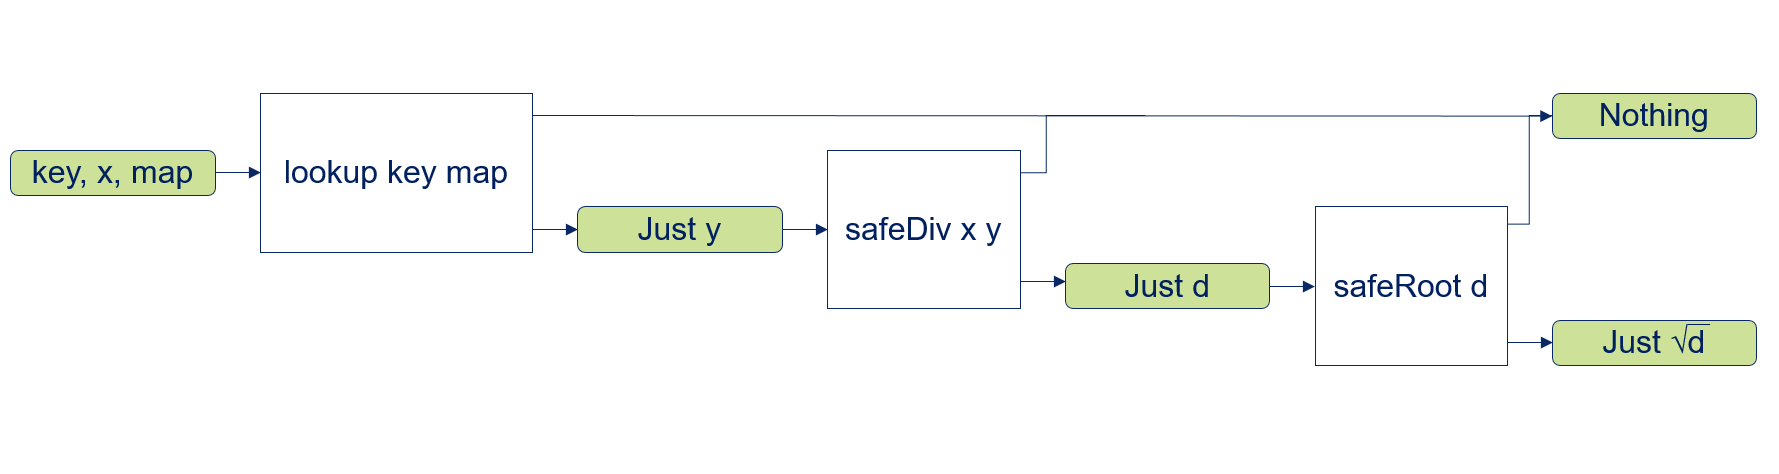

# One Maybe `andThen` the next...

So we are looking for a way to improve the code by abstracting away the chaining of functions that return `Maybe` values and providing a way to short circuit the Nothing cases without being so "noisy" when coding. 

We are looking for an operator `>>=` (speak “and then”) that takes the `Maybe` result of a first function application as first argument, and a function as second argument that will be used in the `Just x` case and again returns a `Maybe` result. In case that the input is `Nothing` the operator will directly return `Nothing` without any further processing. In case that the input is `Just x` the operator will apply the argument function `fun` to `x` and return its result:

```haskell
(>>=) :: Maybe a -> (a -> Maybe b) -> Maybe b
Nothing  >>= fun = Nothing
(Just x) >>= fun = fun x
```

# Programming a semicolon

We can then rewrite findDivRoot as follows:

In [18]:
findDivRoot' :: Double -> String -> [(String, Double)] -> Maybe Double
findDivRoot' x key map =
    lookup key map >>= 
    safeDiv x      >>= 
    safeRoot
    
findDivRoot' 27 "v" [("v", 3), ("k", 4)]

Just 3.0

## Awesome!

Wow, by introducing the `>>=` operator we just invented **Monads**! `Maybe` is a **Monadic Container**. `>>=` allows sequential execution of expressions (quite similar to a chain of statements in imperative languages that are separated by a semicolon).

Thus `>>=` is sometimes also called a “programmable semicolon”, as its semantic can be defined by the programmer.

# Benefits of functional programming

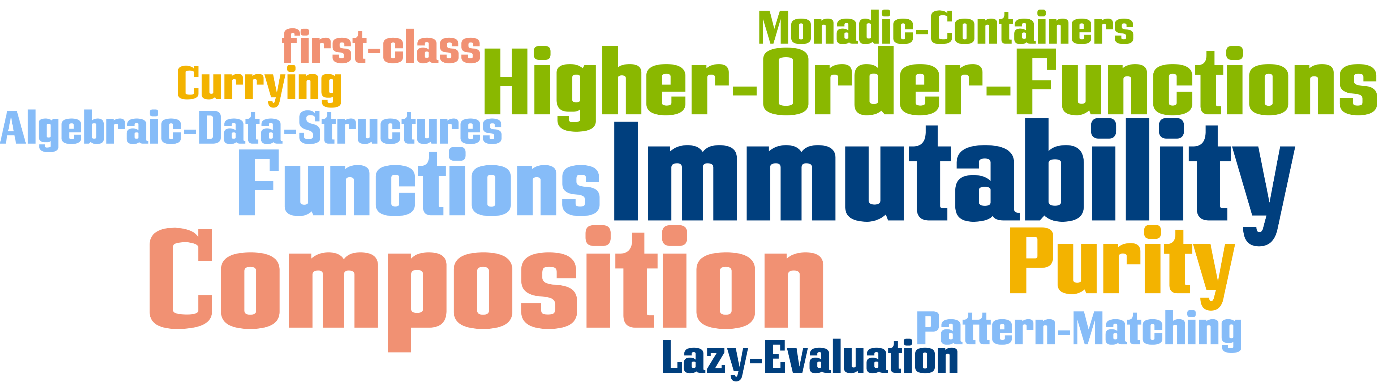

**Using FP concepts will help to create better designs.**

Designs that: 

- are more readable (due to their declarative character), 
- are closer to the problem domain (as intended by domain driven design), 
- allow equational reasoning (due to immutability & purity), 
- Highly scalable (immutability makes it easy to run many threads in parallel, see also map-reduce architecture)
- will provide a rigid separation of business logic and side effects (e.g. hexagonal architecture, clean architecture), 
- are flexible for future changes or extensions (composition, higher order functions), 
- provide better testability (no mocking frameworks required. Supporting BDD, TDD and property based testing), 
- will need much less debugging (There are no NullPointerExceptions!), 
- are better to maintain (due to isolated side effects refactoring becomes much easier), 
- and, last but not least, will be more fun to write.

# Further readings

- [Why Functional Programming matters](https://www.cs.kent.ac.uk/people/staff/dat/miranda/whyfp90.pdf): a classic paper from 1989/90. I‘ve incorporated several examples from this text into my presentation.

- [How FP mattered](https://academic.oup.com/nsr/article/2/3/349/1427872): An update to "Why FP matters" from 2015.

- [Why Haskell Matters](https://github.com/thma/WhyHaskellMatters/#readme): The extended version of my presentation. Many more code examples.

- [Funktionale Programmierung geht auch mit Java!](https://www.sippsack.de/files/talks/Falk-Sippach-Functional-Java.pdf): This presentation shows how you can apply functional programming techniques in Java. (It also shows that adding those features on top of an imperative, OO language may look a bit clumsy…)

- [Learn you a Haskell](http://learnyouahaskell.com/chapters): Very nice, moderately paced introduction to the language

- [OO versus FP](https://blog.codota.com/object-oriented-dead-or-alive/): A recent blog post on the OO versus FP topic

- [Reconciling concepts from FP and OOP](https://thma.github.io/posts/2020-12-20-reconciling-fp-and-oop-concepts.html) Looking at some underlying concepts of OOP and FP

- [Why I prefer Functional Programming](https://www.haskellforall.com/2020/10/why-i-prefer-functional-programming.html): Very brief overview highlighting similar ideas as in my presentation